In [1]:
import cv2
import matplotlib.pyplot as plt

In [9]:
def draw_bounding_boxes(image_path, bbox_data, figsize=(12, 8)):
    # Load the image
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Open and read the bounding box data
    with open(bbox_data, 'r') as file:
        lines = file.readlines()

    # Process each bounding box
    for line in lines:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())

        # Convert from relative to absolute coordinates
        x_center, y_center, bbox_width, bbox_height = (
            x_center * width, y_center * height, bbox_width * width, bbox_height * height
        )

        # Calculate coordinates of the top left corner
        x_top_left = int(x_center - bbox_width / 2)
        y_top_left = int(y_center - bbox_height / 2)

        # Draw the bounding box
        cv2.rectangle(image, (x_top_left, y_top_left), (x_top_left + int(bbox_width), y_top_left + int(bbox_height)), (255, 0, 0), 2)  # Blue color in BGR format, 2px thickness

    # Convert color from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    # Display the image with bounding boxes
    plt.imshow(image, interpolation='none')
    plt.axis('off')
    plt.show()


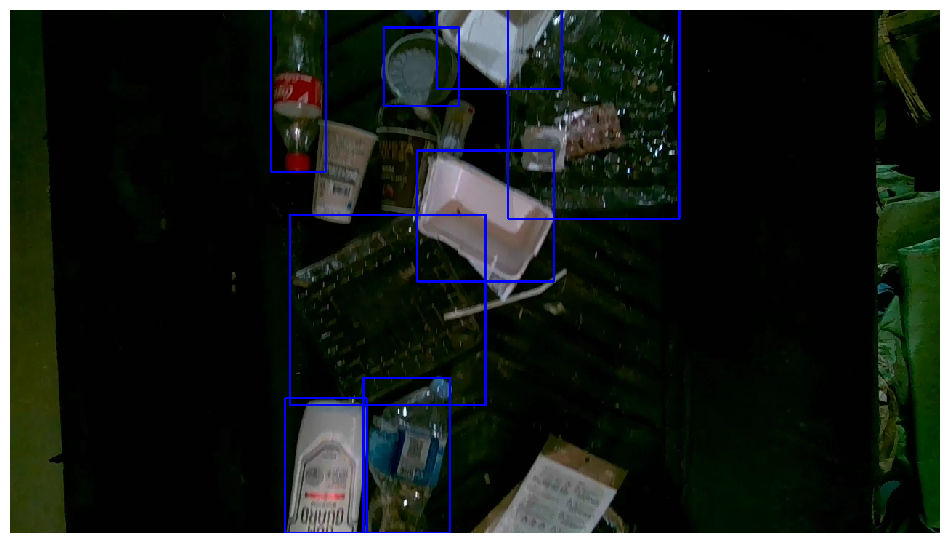

In [10]:
# Replace with your image and annotation file paths
image_path = '../wim_data/train/images/2023-04-21_48.mp4#t=0.jpg'
bbox_data = '../wim_data/train/labels/2023-04-21_48.mp4#t=0.txt'

draw_bounding_boxes(image_path, bbox_data, figsize=(12, 8))